In [1]:
import logging
import os

import matplotlib.pyplot as plt

import numpy as np

from data.data_preparer import DataPreparer
from src.data.data_reader import DataReader

from tools.restaurant_profiles_manager import RestaurantProfilesManager
from tools.user_profiles_manager import UserProfilesManager

logging.basicConfig(level=logging.INFO)

while str(os.getcwd())[-3:] != 'src':  # Execute from src-directory root
    os.chdir('..')

In [2]:
(businesses, reviews, users), _ = DataReader().read_data(no_train_test=True)
user_profile_config = UserProfilesManager().get_best()
restaurant_profile_config = RestaurantProfilesManager().get_best()
input_ml, _ = DataPreparer.transform_data(businesses, reviews, users, user_profile_config, restaurant_profile_config)

INFO:root:Splitting in generation and prediction sets                                                     
INFO:root:Creating User Profile
INFO:root:Finished reading in data, starting NLP...
INFO:root:Loading in all scores...
INFO:root:Merging Reviews...
INFO:root:Loading in NLP model...
INFO:root:Calculating bert_scores...


Pandas Apply:   0%|          | 0/2365515 [00:00<?, ?it/s]

INFO:root:creating user profiles from bert_scores...
INFO:root:Exploding bert_scores (late) & normalizing user profiles...


Dask Apply:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:root:Saving user profiles...
INFO:root:Saved user profiles with name: profile_tmp.parquet
INFO:root:Creating Restaurant Profile
INFO:root:Finished reading in data, starting NLP...
INFO:root:Loading in all scores...
INFO:root:Merging Reviews...
INFO:root:Loading in NLP model...
INFO:root:Calculating bert_scores...


Pandas Apply:   0%|          | 0/2365515 [00:00<?, ?it/s]

INFO:root:creating user profiles from bert_scores...
INFO:root:Exploding bert_scores (late) & normalizing business profiles...


Dask Apply:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:root:Saving business profiles...
INFO:root:Saved business profiles with name: profile_tmp.parquet
INFO:root:Transforming to ML input


In [3]:
input_correlation = input_ml.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(input_correlation, dtype=bool))

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 6.00000e+00,
        1.20000e+01, 1.30000e+01, 2.80000e+01, 4.60000e+01, 1.00000e+02,
        2.79000e+02, 1.23300e+03, 4.13900e+03, 1.46540e+04, 1.84368e+05,
        1.37872e+05, 5.12940e+04, 4.01380e+04, 2.27420e+04, 1.40050e+04,
        8.96400e+03, 5.74700e+03, 3.68300e+03, 2.36600e+03, 1.57900e+03,
        9.83000e+02, 5.71000e+02, 3.32000e+02, 1.99000e+02, 8.10000e+01,
        3.80000e+01, 1.40000e+01, 1.40000e+01, 3.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32

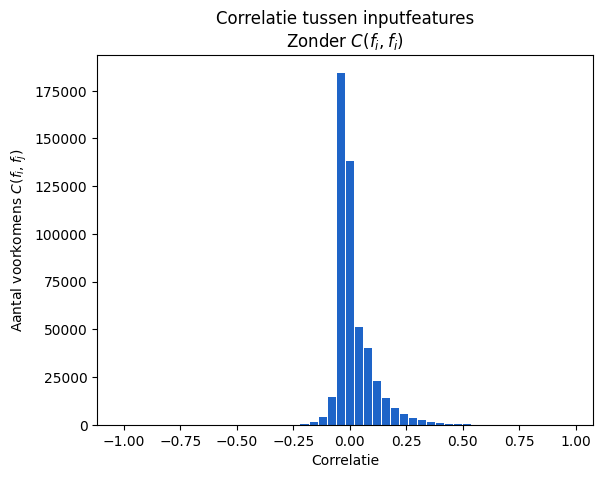

In [77]:
data = input_correlation.where(~mask).to_numpy()
data = data[~np.isnan(data)].tolist()
data = sorted(data)

plt_data = plt.subplots(1, 1)
fig2: plt.Figure = plt_data[0]
ax2: plt.Axes = plt_data[1]

ax2.set_title("Correlatie tussen inputfeatures\n" + r"Zonder $C(f_i, f_i)$")
ax2.set_xlabel("Correlatie")
ax2.set_ylabel(r"Aantal voorkomens $C(f_i, f_j)$")
ax2.hist(data, bins=50, range=(-1, 1), color='#1E64C8', align='left', rwidth=0.9)

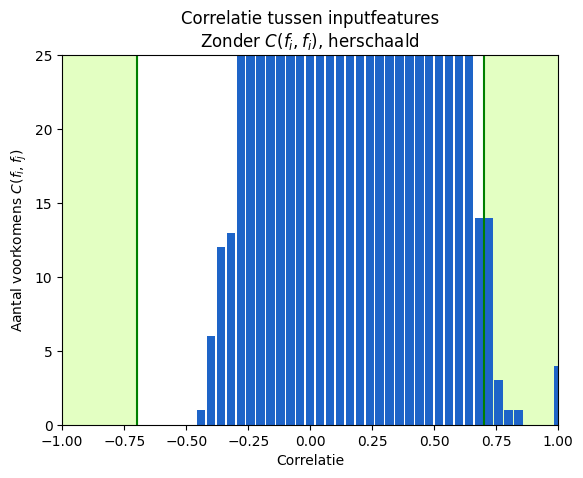

In [117]:
plt_data2 = plt.subplots(1, 1)
fig3: plt.Figure = plt_data2[0]
ax3: plt.Axes = plt_data2[1]

ax3.set_title("Correlatie tussen inputfeatures\n" + r"Zonder $C(f_i, f_i)$, herschaald")
ax3.set_xlabel("Correlatie")
ax3.set_ylabel(r"Aantal voorkomens $C(f_i, f_j)$")
ax3.set_ylim(0, 25)
ax3.set_xlim(-1, 1)
ax3.fill_between((-1.1, -0.7), (50, 50), color='#e3ffc2')
ax3.fill_between((0.7, 1.1), (50, 50), color="#e3ffc2")
ax3.hist(data, bins=50, range=(-1, 1), color='#1E64C8', align='right', rwidth=0.85)
ax3.axvline(0.7, color="green")
ax3.axvline(-0.7, color="green")


In [127]:
# For easy LaTeX table

combos = []

for index, data_r in input_correlation.where(~mask).iterrows():
    for column in data_r.index:
        if abs(data_r[column]) >= 0.70:
            combos.append([index, column])
            
for combo in combos:
    for i in range(len(combo)):
        combo[i] = combo[i].replace("_", " ")
        combo[i] = combo[i].replace("&", r"\&")
    row = f'{combo[0]} & {combo[1]} \\\\'
    print(row)

category nightlife & category bars \\
category event planning \& services & category caterers \\
category beer & category wine \& spirits \\
category music venues & category arts \& entertainment \\
business profile 37 & business profile 17 \\
business profile 323 & business profile 180 \\
user compliments & user fans \\
user positive interactions & user fans \\
user positive interactions & user compliments \\
user category nightlife & user category bars \\
user category japanese & user category sushi bars \\
user category event planning \& services & user category caterers \\
user category beer & user category wine \& spirits \\
user category music venues & user category arts \& entertainment \\


In [132]:
input_corr2 = input_correlation.copy(deep=True)
input_corr2.style.background_gradient(cmap='coolwarm').to_html("corr.html")

D:\Documents\Projects\MasterThesis\.venv_windows3.10\lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
D:\Documents\Projects\MasterThesis\.venv_windows3.10\lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax
